In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
#Read Data
data = pd.read_csv('../../SynData/data/GeneratedData.csv')


In [3]:
#General data info
data.head()

,Unnamed: 0,CPU,throughput
0,0,0.354441,30.338909
1,1,0.493504,40.112504
2,2,0.961547,67.373333
3,3,0.758908,56.469337
4,4,0.347401,29.817774


In [4]:
data.describe()

,Unnamed: 0,CPU,throughput
count,300.000000,300.000000,300.000000
mean,149.500000,0.541960,41.353903
std,86.746758,0.295906,20.116394
min,0.000000,0.000412,0.041189
25%,74.750000,0.285819,25.139570
50%,149.500000,0.578239,45.630774
75%,224.250000,0.786403,58.020421
max,299.000000,0.998286,69.228988


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
Unnamed: 0    300 non-null int64
CPU           300 non-null float64
throughput    300 non-null float64
dtypes: float64(2), int64(1)
memory usage: 7.1 KB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


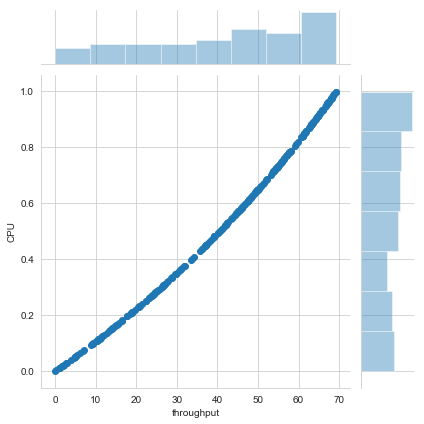

In [6]:
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="scatter")


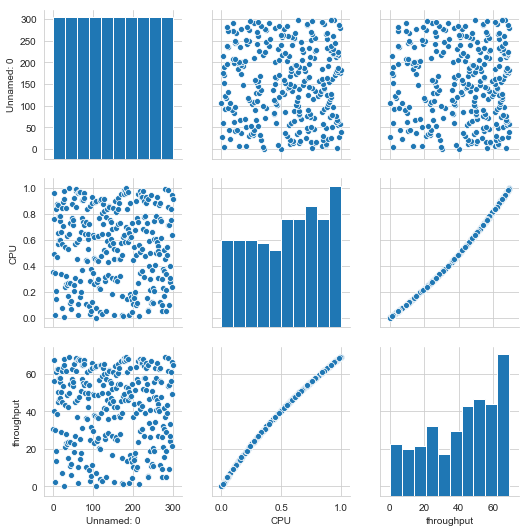

In [7]:
sns.pairplot(data)


In [8]:
data['throughput'].corr(data['CPU'])


0.9960984119006693

In [9]:
datalm = data


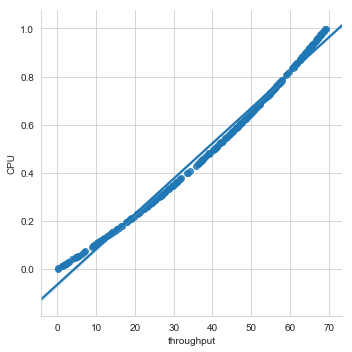

In [10]:
sns.lmplot(x='throughput',y='CPU',data=datalm)


In [11]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
n = len(X)
kf = KFold(n_splits=5)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

rf = RandomForestRegressor(max_depth=2, random_state=0,
                             n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
#Test data prediction
prediction = rf.predict(X_test)
X_test = np.array(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Throuput':X_test.flatten(),'Actual_CPU': y_test.flatten(), 'Predicted_CPU': prediction.flatten()})
df

,Throuput,Actual_CPU,Predicted_CPU
0,0.671546,0.592078,0.643311
1,0.586078,0.500662,0.523008
2,0.379941,0.301197,0.361944
3,0.274474,0.209630,0.112258
4,0.153184,0.112262,0.103660
5,0.963302,0.948188,0.897942
6,0.168069,0.123777,0.103660
7,0.452815,0.368485,0.361944
8,0.731907,0.659974,0.643311
9,0.295344,0.227223,0.205858


In [13]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 0.04931577502212365
MSE: 0.003437766647323448
RMSE: 0.05863247092971136


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


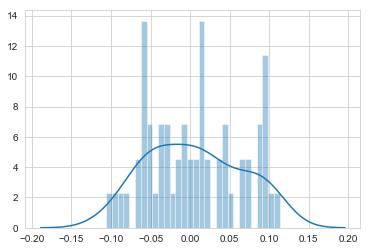

In [14]:
#Residuals
sns.distplot(y_test-prediction,bins=30)

In [15]:
# save the model to disk
filename = '../models/randomForest_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [16]:
rf.predict([[0]])

array([0.10366032])